<a href="https://colab.research.google.com/github/AkithaPasandul/Advanced-Statistics-for-Data-Science-Coursework-/blob/main/Adv_Stat_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

## Student performance dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df1 = pd.read_csv('/content/StudentsPerformance.csv')
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**T-test - Math score between males and females**

Hypotheses:

*   Null Hypothesis (H₀): There is no significant difference in average math scores between male and female students.
*   Alternative Hypothesis (H₁): There is a significant difference in average math scores between male and female students.



In [ ]:
male_math = df1[df1['gender'] == 'male']['math score']
female_math = df1[df1['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math, female_math)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.383245869828983
P-value: 9.120185549328822e-08


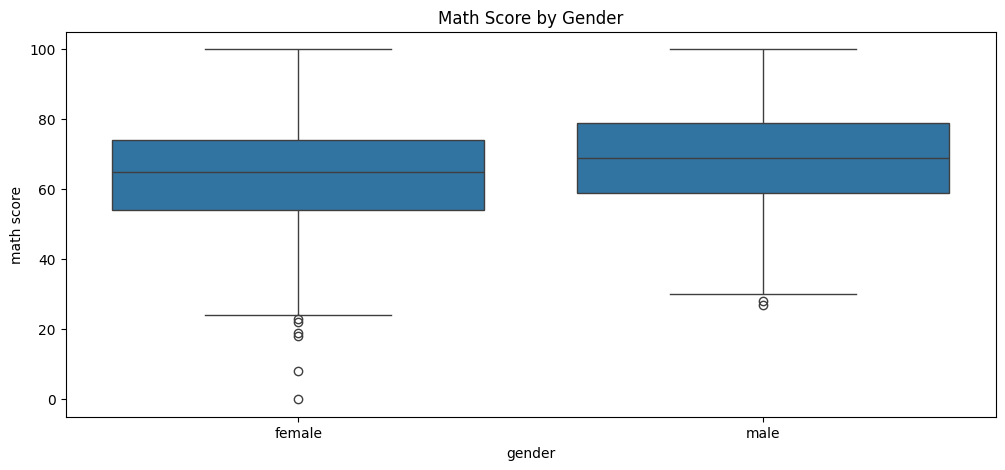

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='gender', y='math score', data=df1)
plt.title('Math Score by Gender')
plt.show()

*   Since the p-value is less than 0.05, we reject the null hypothesis.
*   There is a statistically significant difference in math scores between male and female students.
*   The sign of the t-statistic indicates the direction: if it's negative, females scored higher on average.

**Mann-Whitney U test - Reading score by test preparation course**

Hypotheses:

*   Null Hypothesis (H₀): There is no difference in reading score distributions between students who completed the test preparation course and those who did not.
*   Alternative Hypothesis (H₁): There is a difference in reading score distributions.



In [ ]:
prep_yes = df1[df1['test preparation course'] == 'completed']['reading score']
prep_no = df1[df1['test preparation course'] == 'none']['reading score']

u_statistic, p_value = stats.mannwhitneyu(prep_yes, prep_no)

print("U-statistic:", u_statistic)
print("P-value:", p_value)

U-statistic: 148497.0
P-value: 1.7117107211380392e-14


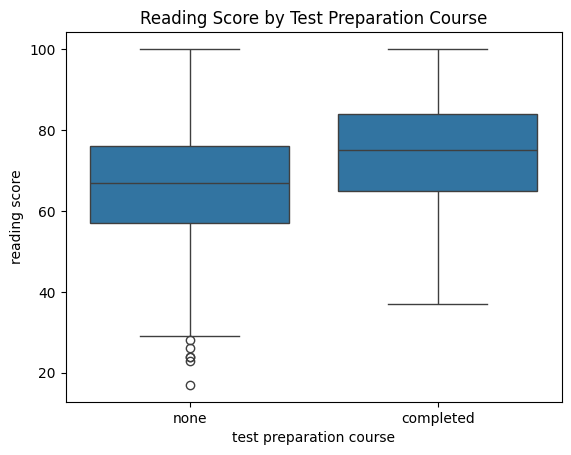

In [ ]:
sns.boxplot(x='test preparation course', y='reading score', data=df1)
plt.title('Reading Score by Test Preparation Course')
plt.show()

*   The p-value is much less than 0.05, so we reject the null hypothesis.

*   There is a statistically significant difference in reading scores between students who completed the test prep course and those who did not.
*   Those who completed the course tend to perform better in reading.


## Heart Disease UCI dataset.

In [ ]:
df2 = pd.read_csv('/content/heart_disease_uci.csv')
df2.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df2.shape

(920, 16)

In [ ]:
df2.dropna(inplace=True)
df2.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


Rename target column for clarity (1 = presence of heart disease)

In [ ]:
df2['num'] = df2['num'].map({0: 'No Disease', 1: 'Disease'})

**T-test on Cholesterol levels**

Hypotheses:

*   H₀ (Null): There is no significant difference in cholesterol levels between patients with and without heart disease.
*   H₁ (Alternative): There is a significant difference in cholesterol levels between the two groups.



In [ ]:
chol_disease = df2[df2['num'] == 'Disease']['chol']
chol_no_disease = df2[df2['num'] == 'No Disease']['chol']

t_statistic, p_value = stats.ttest_ind(chol_disease, chol_no_disease)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.3212833428130641
P-value: 0.7483092427920506


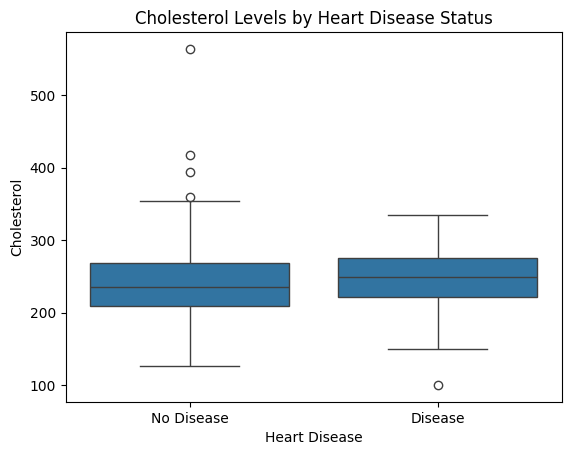

In [ ]:
sns.boxplot(x='num', y='chol', data=df2)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.ylabel('Cholesterol')
plt.xlabel('Heart Disease')
plt.show()

*   Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
*   This means there is no statistically significant difference in cholesterol
*   levels between patients with and without heart disease in this sample.

**Chi-square test: Heart Disease vs Sex**

Hypotheses:

*   H₀ (Null): Sex and presence of heart disease are independent.
*   H₁ (Alternative): There is an association between sex and heart disease.


In [ ]:
contingency_table = pd.crosstab(df2['sex'], df2['num'])
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 13.062136292016808
P-value: 0.00030132555617937027


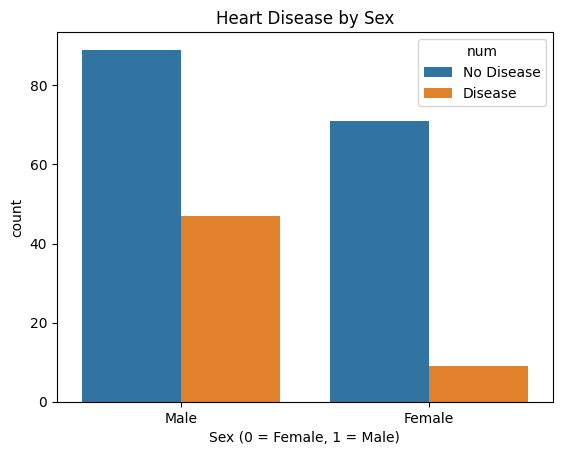

In [ ]:
sns.countplot(x='sex', hue='num', data=df2)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

*   Since the p-value is less than 0.05, we reject the null hypothesis.
*   There is a statistically significant association between sex and the presence of heart disease.
*   In other words heart disease is not equally distributed across males and females one group may be more affected than the other.



# Linear Regression

## Simple Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df3 = pd.read_csv('/content/SLPassengerCount.csv')
df3.head()

,Month,Passengers
0,2011-01,314741
1,2011-02,380160
2,2011-03,412413
3,2011-04,412293
4,2011-05,352690


In [ ]:
df3.tail()

,Month,Passengers,TimeIndex
151,2023-08-01,589254,151
152,2023-09-01,519694,152
153,2023-10-01,481140,153
154,2023-11-01,550166,154
155,2023-12-01,675171,155


In [ ]:
df3.shape

(156, 2)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       156 non-null    object
 1   Passengers  156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
# Convert 'Month' to datetime and create a time index
df3['Month'] = pd.to_datetime(df3['Month'])
df3['TimeIndex'] = (df3['Month'].dt.year - df3['Month'].dt.year.min()) * 12 + df3['Month'].dt.month - 1

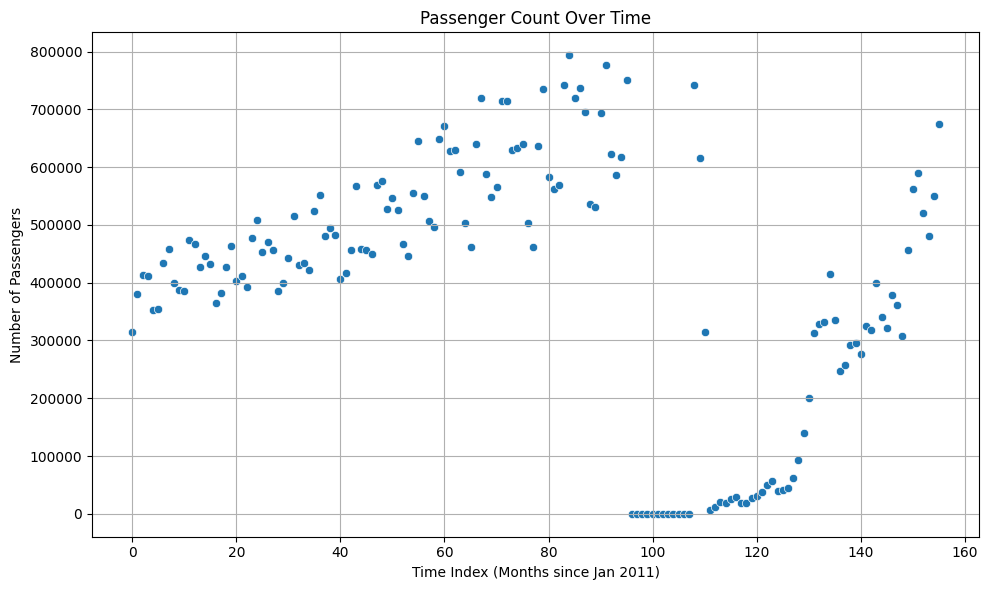

In [ ]:
# Scatter plot to visualize trend
plt.figure(figsize=(10,6))
sns.scatterplot(x='TimeIndex', y='Passengers', data=df3)
plt.title("Passenger Count Over Time")
plt.xlabel("Time Index (Months since Jan 2011)")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Fit the linear regression model
model = smf.ols('Passengers ~ TimeIndex', data=df3).fit()

In [ ]:
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     19.19
Date:                Sat, 03 May 2025   Prob (F-statistic):           2.18e-05
Time:                        17:11:41   Log-Likelihood:                -2131.9
No. Observations:                 156   AIC:                             4268.
Df Residuals:                     154   BIC:                             4274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.281e+05   3.34e+04     15.800      0.0

**Simple linear regression plot**

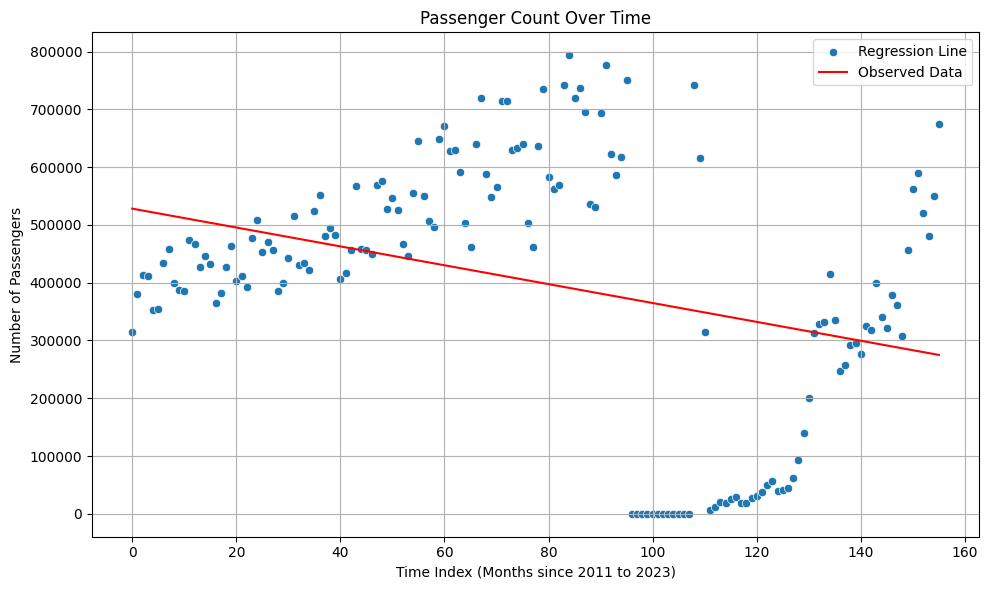

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='TimeIndex', y='Passengers', data=df3)
plt.plot(df3['TimeIndex'], model.predict(), color='red')
plt.title("Passenger Count Over Time")
plt.xlabel("Time Index (Months since 2011 to 2023)")
plt.ylabel("Number of Passengers")
plt.legend(['Regression Line', 'Observed Data'])
plt.grid(True)
plt.tight_layout()
plt.show()

**ANOVA table**

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                 sum_sq     df          F    PR(>F)
TimeIndex  8.439517e+11    1.0  19.185723  0.000022
Residual   6.774233e+12  154.0        NaN       NaN


**R-squared value**

In [ ]:
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.11078120644631462


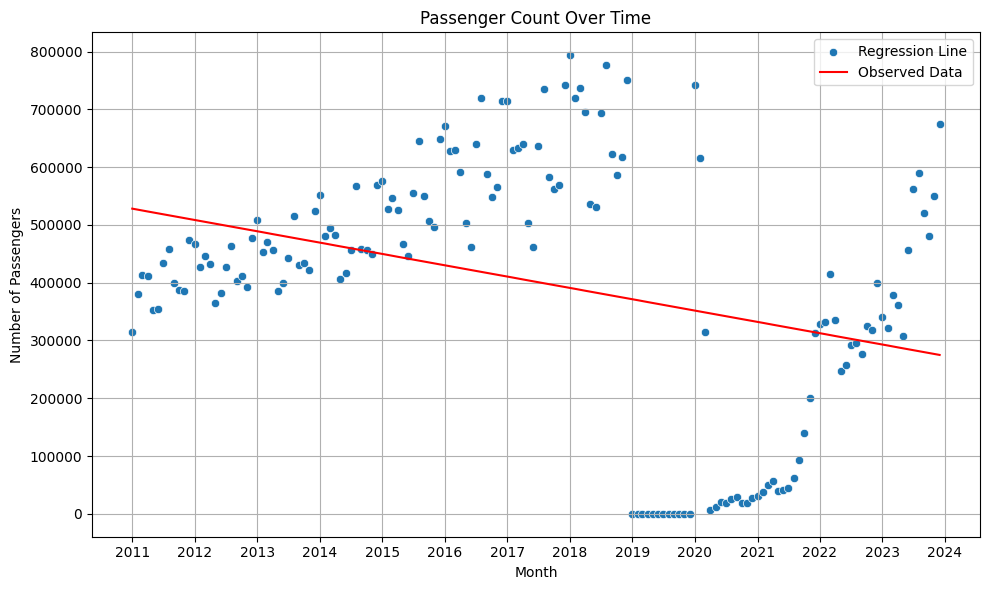

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Month', y='Passengers', data=df3)  # Use 'Month' for x-axis
plt.plot(df3['Month'], model.predict(df3[['TimeIndex']]), color='red')  # Predict using TimeIndex
plt.title("Passenger Count Over Time")
plt.ylabel("Number of Passengers")
plt.legend(['Regression Line', 'Observed Data'])
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## Multiple Linear Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df4 = pd.read_csv('/content/insurance.csv')
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df4.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df4.shape

(1338, 7)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Create a mapping for smoker column
smoker_mapping = {'yes': 1, 'no': 0}

# Encode the 'smoker' column using the mapping
df4['smoker'] = df4['smoker'].map(smoker_mapping)

In [ ]:
gender_mapping = {'male': 1, 'female': 0}
df4['sex'] = df4['sex'].map(gender_mapping)

Select independent and dependent variables

In [ ]:
model = smf.ols('charges ~ age + sex + bmi + children + smoker', data=df4).fit()

In [ ]:
# Show regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        20:22:16   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.205e+04    951.260    -12.670      0.0

In [ ]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Table:")
print(vif_data)


VIF Table:
    Feature        VIF
0     const  32.863734
1       age   1.015129
2       sex   1.008878
3       bmi   1.014578
4  children   1.002242
5    smoker   1.006457


**Multiple linear regression plot**

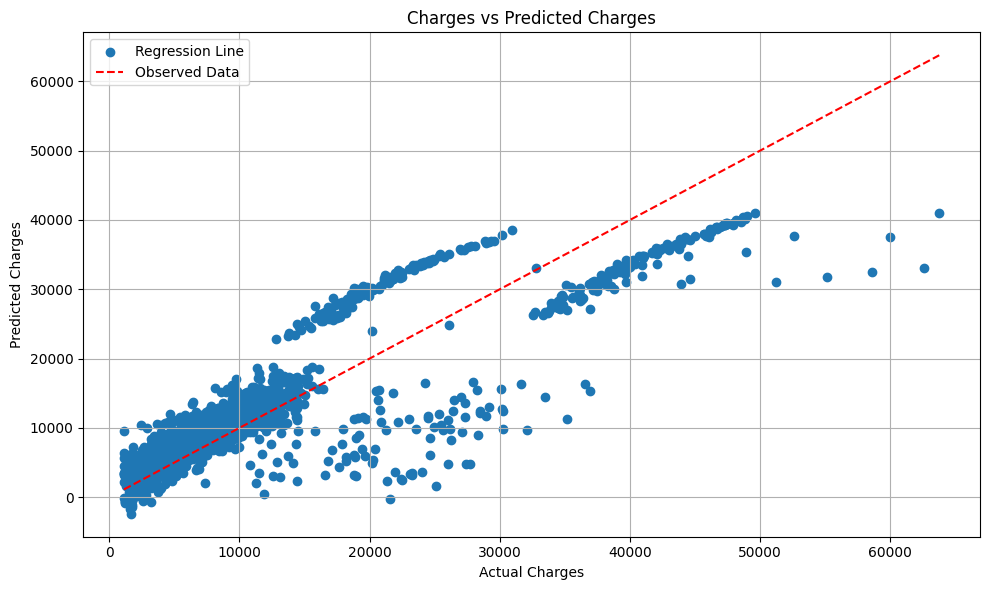

In [ ]:
plt.figure(figsize=(10,6))

# Select the relevant columns for prediction
X_pred = df4[['age', 'sex', 'bmi', 'children', 'smoker']]

# Add constant for intercept term (if the model was trained with it)
X_pred = sm.add_constant(X_pred)

plt.scatter(df4['charges'], model.predict(X_pred))
plt.plot([min(df4["charges"]), max(df4["charges"])],
         [min(df4["charges"]), max(df4["charges"])],
         color='red', linestyle="dashed", label="Ideal Prediction (y = x)")
plt.title("Charges vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend(['Regression Line', 'Observed Data'])
plt.grid(True)
plt.tight_layout()
plt.show()

ANOVA Table

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                sum_sq      df            F        PR(>F)
age       1.727060e+10     1.0   468.780192  2.593679e-89
sex       5.486063e+06     1.0     0.148910  6.996412e-01
bmi       5.092619e+09     1.0   138.230253  1.954711e-30
children  4.363125e+08     1.0    11.842943  5.967197e-04
smoker    1.228706e+11     1.0  3335.109303  0.000000e+00
Residual  4.907296e+10  1332.0          NaN           NaN


# Time Series Analysis

## Colombo Weather

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df5 = pd.read_csv('/content/colombo_weather.csv')
df5.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1/18/1956,77.0,84.0,NaN,NaN,NaN,NaN
1,1/19/1956,NaN,NaN,NaN,NaN,NaN,NaN
2,1/20/1956,NaN,NaN,NaN,NaN,NaN,NaN
3,1/21/1956,NaN,NaN,NaN,NaN,NaN,NaN
4,1/22/1956,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df5.shape

(25306, 7)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       25306 non-null  object 
 1   TAVG (Degrees Fahrenheit)  7593 non-null   float64
 2   TMAX (Degrees Fahrenheit)  6330 non-null   float64
 3   TMIN (Degrees Fahrenheit)  5532 non-null   float64
 4   PRCP (Inches)              5992 non-null   float64
 5   SNOW (Inches)              0 non-null      float64
 6   SNWD (Inches)              0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 1.4+ MB


In [ ]:
df5.drop(['SNOW (Inches)', 'SNWD (Inches)'], axis=1, inplace=True)

### part 1

In [ ]:
# Convert 'Date' column to datetime objects
df5['Date'] = pd.to_datetime(df5['Date'])

In [ ]:
# Set 'Date' as the index
df5 = df5.set_index('Date')

In [ ]:
start_date = '2009-01-01'
end_date = '2025-04-30'
df5_clean = df5.loc[start_date:end_date]

df5_clean.head()

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches)
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,NaN
2009-01-05,80.0,87.0,NaN,0.0


In [ ]:
for col in df5.columns:
  if df5[col].isnull().any():
    df5[col].fillna(df5[col].mean(), inplace=True)

# Verify if missing values are filled
print(df5.isnull().sum())

TAVG (Degrees Fahrenheit)    0
TMAX (Degrees Fahrenheit)    0
TMIN (Degrees Fahrenheit)    0
PRCP (Inches)                0
dtype: int64


In [ ]:
df5_clean.isnull().sum()

,0
TAVG (Degrees Fahrenheit),0
TMAX (Degrees Fahrenheit),0
TMIN (Degrees Fahrenheit),0
PRCP (Inches),0


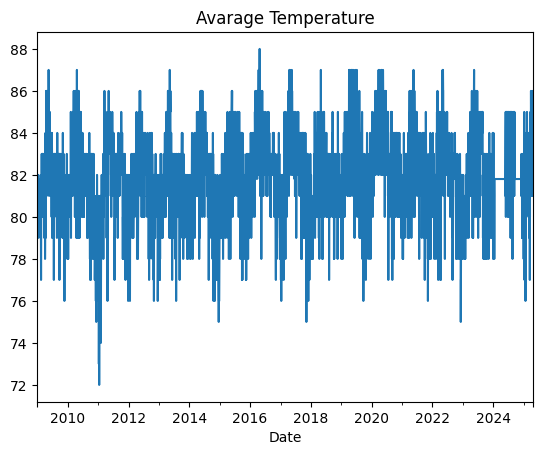

In [ ]:
df5_clean['TAVG (Degrees Fahrenheit)'].plot(title = "Avarage Temperature")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

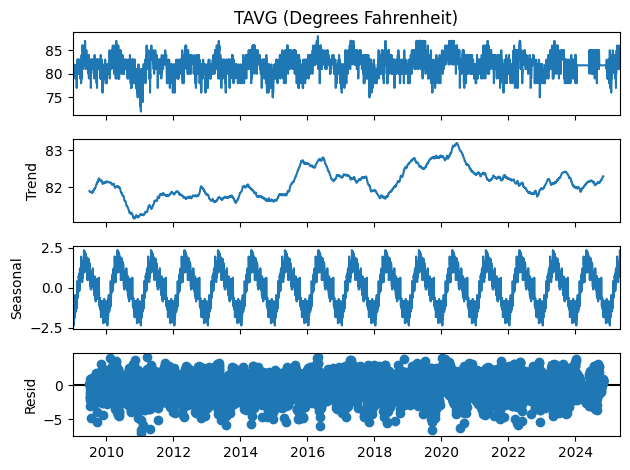

In [ ]:
seasonal_decompose(df5_clean['TAVG (Degrees Fahrenheit)'], model='additive', period = 365).plot()
plt.show()

### Part 2

In [ ]:
ts = df5_clean['TAVG (Degrees Fahrenheit)'].resample('M').mean().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.39693142051149
p-value: 0.14260436633886692


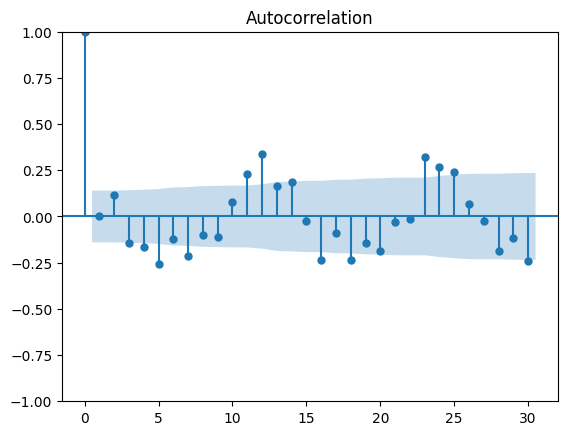

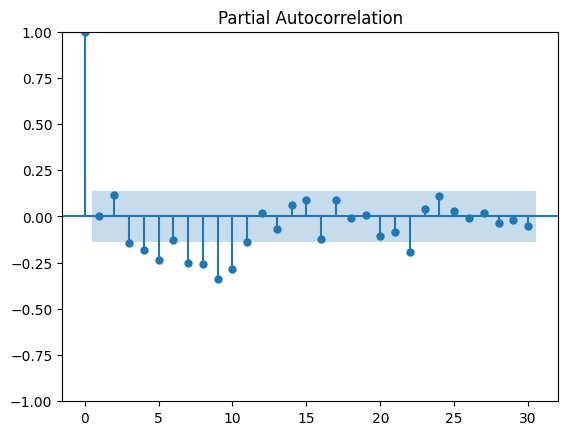

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

ts_diff = ts.diff().dropna()

plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

**ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(ts, order=(1, 1, 1))  # adjust (p,d,q) based on ACF/PACF
arima_result = arima_model.fit()
print(arima_result.summary())

                                   SARIMAX Results                                   
Dep. Variable:     TAVG (Degrees Fahrenheit)   No. Observations:                  196
Model:                        ARIMA(1, 1, 1)   Log Likelihood                -284.457
Date:                       Mon, 05 May 2025   AIC                            574.915
Time:                               12:05:01   BIC                            584.734
Sample:                           01-31-2009   HQIC                           578.890
                                - 04-30-2025                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2529      3.742      0.068      0.946      -7.082       7.587
ma.L1         -0.2370      3.751     -0.063      0.950      -7.588       7.

**SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:          TAVG (Degrees Fahrenheit)   No. Observations:                  196
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -219.999
Date:                            Mon, 05 May 2025   AIC                            449.998
Time:                                    12:05:06   BIC                            466.045
Sample:                                01-31-2009   HQIC                           456.502
                                     - 04-30-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4115      0.067      6.134      0.000       0.280       0.543
ma.L1         -0.9710      0.033   

In [ ]:
# Get the last timestamp in the original series
last_date = ts.index[-1]

# Create a new DatetimeIndex for the forecast period
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='M')

# Assign index to forecasts
arima_forecast.index = future_dates
sarima_forecast.index = future_dates

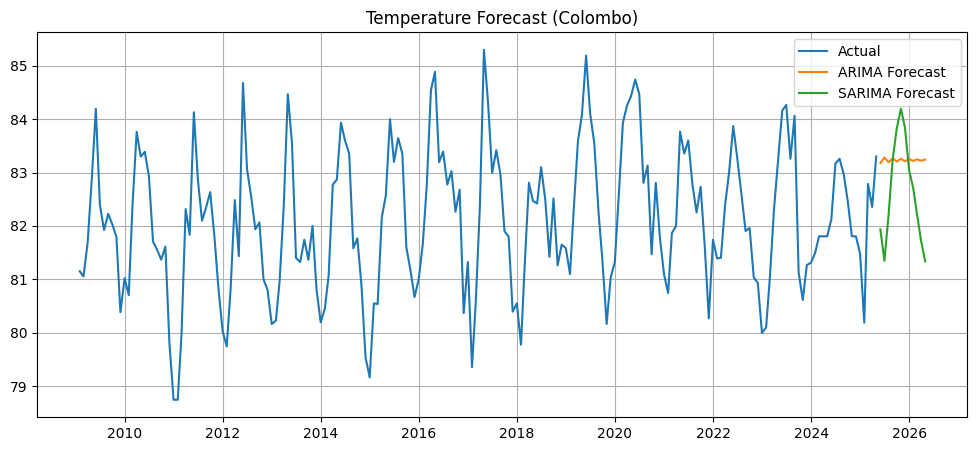

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title("Temperature Forecast (Colombo)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train = ts[:-12]
test = ts[-12:]

In [ ]:
arima = ARIMA(train, order=(1, 1, 1)).fit()
sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

In [ ]:
arima_pred = arima.forecast(steps=12)
sarima_pred = sarima.forecast(steps=12)

In [ ]:
# Evaluate
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred) * 100:.2f}%")

evaluate(test, arima_pred, "ARIMA")
evaluate(test, sarima_pred, "SARIMA")


ARIMA Evaluation:
MAE:  0.83
RMSE: 1.00
MAPE: 1.00%

SARIMA Evaluation:
MAE:  0.60
RMSE: 0.70
MAPE: 0.73%


## Retail data forcasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df6 = pd.read_csv('/content/Microsoft_Stock.csv')
df6.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df6.shape

(1511, 6)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [ ]:
df6['Date'] = pd.to_datetime(df6['Date'])
df6 = df6.set_index('Date')

<Axes: ylabel='Close'>

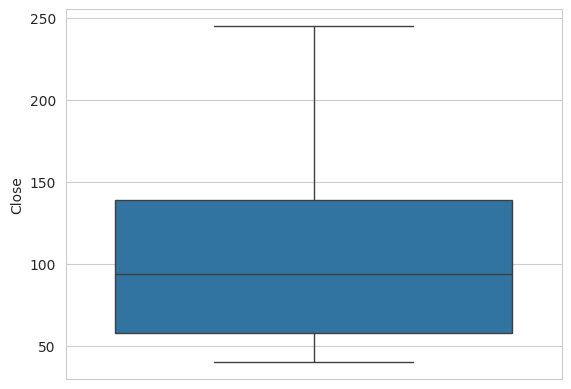

In [ ]:
sns.boxplot(df6['Close'])

In [ ]:
# Use 'Close' price
ts = df6['Close'].resample('M').mean().dropna()

In [ ]:
ts.head()

,Close
Date,
2015-04-30,43.466667
2015-05-31,47.530000
2015-06-30,45.964091
2015-07-31,45.611818
2015-08-31,45.506667


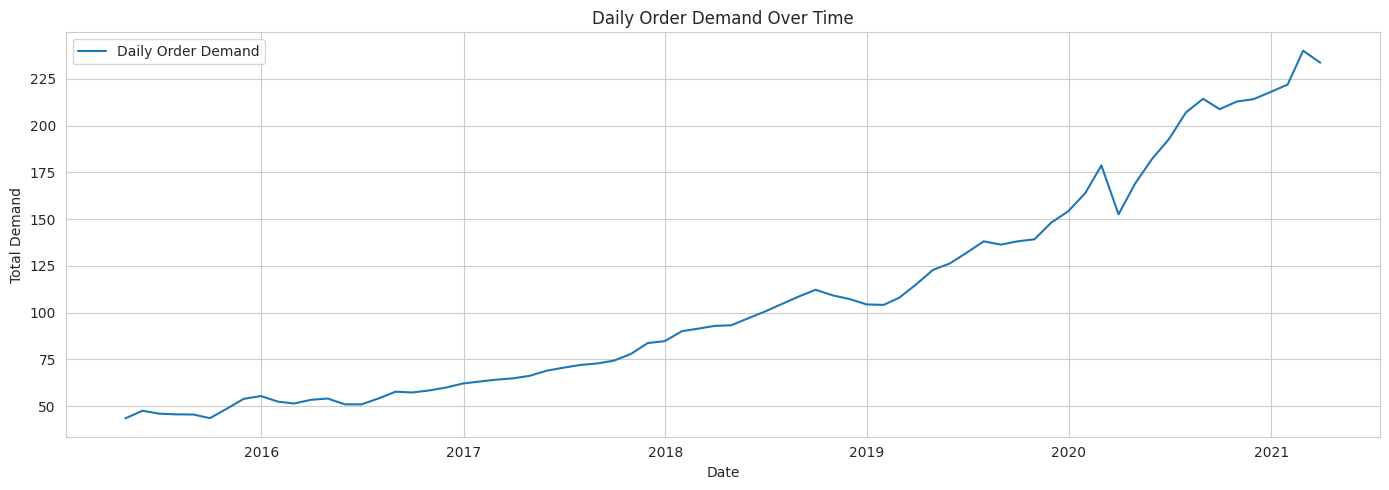

In [ ]:
# Plot the daily demand time series
plt.figure(figsize=(14, 5))
plt.plot(ts, label='Daily Order Demand')
plt.title('Daily Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Perform Augmented Dickey-Fuller test

In [ ]:
adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: 3.832783960839826
p-value: 1.0


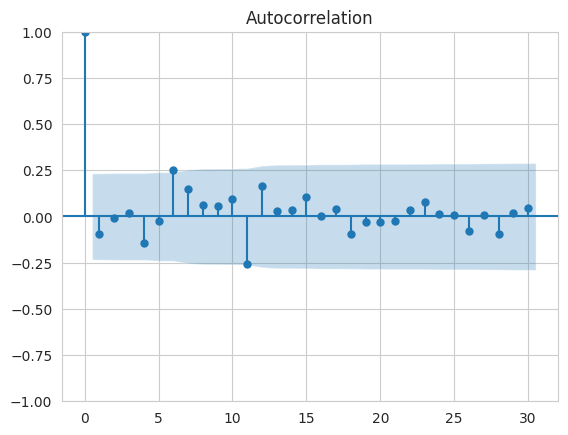

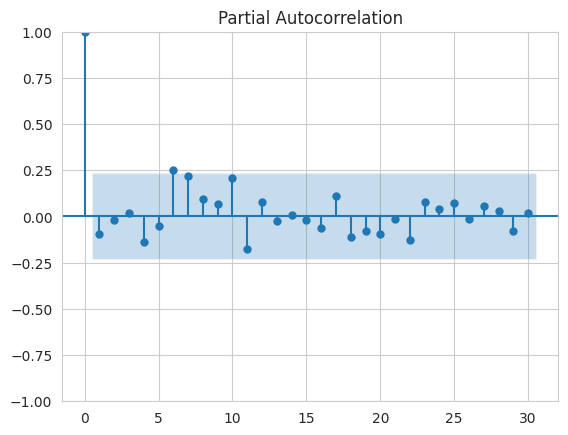

In [ ]:
ts_diff = ts.diff().dropna()

plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

**ARIMA**

In [ ]:
arima_model = ARIMA(ts, order=(1, 1, 1))
arima_result = arima_model.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -226.995
Date:                Wed, 07 May 2025   AIC                            459.989
Time:                        16:06:41   BIC                            466.777
Sample:                    04-30-2015   HQIC                           462.688
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9941      0.054     18.523      0.000       0.889       1.099
ma.L1         -0.9446      0.129     -7.320      0.000      -1.198      -0.692
sigma2        34.5067      4.160      8.296      0.0

**SARIMA**

In [ ]:
sarima_model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -192.605
Date:                            Wed, 07 May 2025   AIC                            395.211
Time:                                    16:07:02   BIC                            405.599
Sample:                                04-30-2015   HQIC                           399.266
                                     - 03-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3865      0.871      0.444      0.657      -1.320       2.093
ma.L1         -0.4855      0.835   

Forecast and Plot

In [ ]:
forecast_steps = 12  # months

# Forecast
arima_forecast = arima_result.forecast(steps=forecast_steps)
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Align forecast dates
future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='M')
arima_forecast.index = future_dates
sarima_forecast.index = future_dates

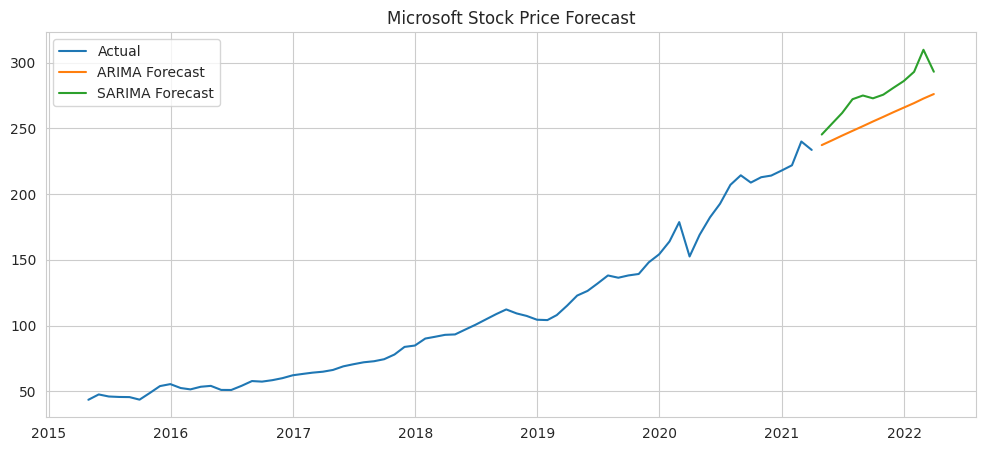

In [ ]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title("Microsoft Stock Price Forecast")
plt.legend()
plt.grid(True)
plt.show()

**Evaluate Forecast Accuracy**

In [ ]:
train = ts[:-30]
test = ts[-30:]

In [ ]:
# Fit models on training data
arima = ARIMA(train, order=(1,1,1)).fit()
sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

In [ ]:
# Forecast
arima_pred = arima.forecast(steps=30)
sarima_pred = sarima.forecast(steps=30)

In [ ]:
# Evaluation
def evaluate(true, pred, model_name):
    # Convert the forecast to a pandas Series with the correct index
    pred = pd.Series(pred, index=true.index)

    # Drop rows with missing values in EITHER true OR pred to ensure alignment
    true_no_nan = true.dropna()
    pred_no_nan = pred.loc[true_no_nan.index] #Align index for prediction to match actual

    print(f"\n {model_name} Performance:")
    print(f"MAE:  {mean_absolute_error(true_no_nan, pred_no_nan):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(true_no_nan, pred_no_nan)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(true_no_nan, pred_no_nan)*100:.2f}%")

evaluate(test, arima_pred, "ARIMA")
evaluate(test, sarima_pred, "SARIMA")


 ARIMA Performance:
MAE:  20.72
RMSE: 27.06
MAPE: 11.41%

 SARIMA Performance:
MAE:  17.41
RMSE: 21.85
MAPE: 9.98%
